# Saliency Map

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


def gradient_input(model, inp, output_index = 0):
  inp_tensor = tf.convert_to_tensor(inp, dtype=tf.float32)
  with tf.GradientTape() as t:
    t.watch(inp_tensor)
    output = tf.squeeze(model(inp_tensor))
    if output.ndim >0: my_output = output[output_index]
    else: my_output = output
    gradient = t.gradient(my_output, inp_tensor)
    gradient = np.squeeze(np.array(gradient))
    return gradient

def gradient_to_image(gradient):
  if gradient.ndim ==3:
    gradient = np.amax(np.abs(gradient), axis = 2)
  image = Image.fromarray(np.uint8(normalize(gradient)*255)) 
  return image

def normalize(gradient):
  return (gradient - gradient.min())/(gradient.max()-gradient.min())

def load_process_image(filename):
  img = Image.open(filename).resize((224,224)).convert("RGB")
  img_np = np.expand_dims(np.array(img), axis = 0)
  inp = tf.keras.applications.resnet50.preprocess_input(img_np)
  return inp, img

model = tf.keras.applications.ResNet50()
inp, img = load_process_image("datasets/images/ouzel.png") 

prediction = model.predict(inp)
class_index = np.argmax(prediction)
print(class_index)
print(tf.keras.applications.resnet.decode_predictions(prediction, top = 1))

gradient = gradient_input(model, inp, class_index)
saliency = gradient_to_image(gradient)

1/1 [==============================] - 1s 891ms/step
20
[[('n01601694', 'water_ouzel', 0.9961522)]]


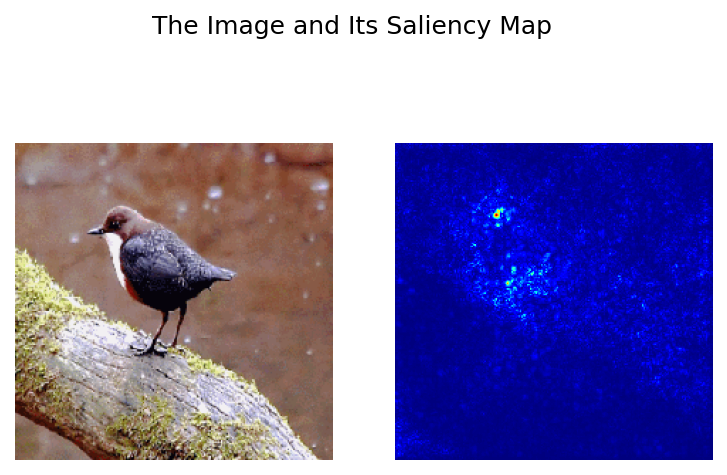

In [8]:
# Visualize the image and the saliency map
fig, ax = plt.subplots(1, 2, dpi = 150)
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(saliency, cmap = 'jet')
ax[1].axis('off')
fig.suptitle('The Image and Its Saliency Map')
plt.show()